
## Installs

Step 1: created conda env and installed rdkit (this installs the correct version of python)

* conda create -c conda-forge -n my-rdkit-env rdkit

Step 2:

* installed all other dependencies via pip



## Train a variational autoencoder to generate molecules.  

* the models use tensorflow

* needs GPU

In [1]:

import deepchem as dc
from deepchem.models.optimizers import ExponentialDecay
from deepchem.models.seqtoseq import AspuruGuzikAutoEncoder

import numpy as np
from rdkit import Chem
from random import shuffle

from rdkit.Chem import QED

from rdkit.Chem.Draw import IPythonConsole


In [2]:

batch_size = 100


In [3]:


tasks, datasets, transformers = dc.molnet.load_muv()
train_dataset, valid_dataset, test_dataset = datasets

## train_smiles = train_dataset.ids     ## takes too long




In [4]:

train_smiles = test_dataset.ids

shuffle(train_smiles)
train_smiles = train_smiles[:8000]

print( len(train_smiles)  )

print( train_smiles  )



8000
['Cc1cc(C)cc(-n2c(C)cc(/C=N/NC(=O)CSc3ncccn3)c2C)c1'
 'O=C1c2ccccc2-c2c1nc1c([n+]2[O-])CCCC1'
 'O=C(N/N=C/c1ccc(OC(=O)c2ccccc2)cc1)c1ccc(CN2CCOCC2)cc1' ...
 'COc1cc(C(=O)Nc2sc3c(c2C(=O)NCc2ccco2)CCCC3)cc(OC)c1OC'
 'CCCS(=O)(=O)c1nc(S(=O)(=O)c2ccc(C)cc2)c(NCCCN2CCOCC2)s1'
 'COc1cccc2c(=O)n(CC(=O)N3CCCCCC3)ccc12']


## Visualize a molecule

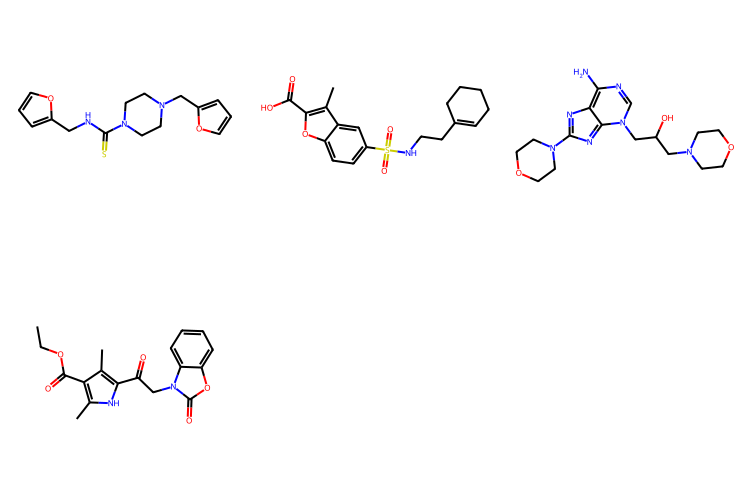

In [5]:

molecule_samples = ['S=C(NCc1ccco1)N1CCN(Cc2ccco2)CC1','Cc1c(C(=O)O)oc2ccc(S(=O)(=O)NCCC3=CCCCC3)cc12',
         'Nc1ncn(CC(O)CN2CCOCC2)c2nc(N3CCOCC3)nc1-2','CCOC(=O)c1c(C)[nH]c(C(=O)Cn2c(=O)oc3ccccc32)c1C' ]

molecule_samples_mol = [ Chem.MolFromSmiles(x) for x in molecule_samples]


Chem.Draw.MolsToGridImage(
          molecule_samples_mol,
          molsPerRow=3,
          subImgSize=(250, 250)
)



* Find the set of tokens that can appear
* and the maximum length of the SMILES strings we are working with.


In [6]:

tokens = set()

for s in train_smiles:
  tokens = tokens.union(set(s))

tokens = sorted(list(tokens))

max_length = max(len(s) for s in train_smiles)



## Build the model


In [7]:


batches_per_epoch = len(train_smiles)/batch_size

learning_rate     = ExponentialDecay(0.001, 0.95, batches_per_epoch)

model = AspuruGuzikAutoEncoder(
             tokens, 
             max_length, 
             model_dir='vae', 
             batch_size=batch_size, 
             learning_rate=learning_rate
)




## Train the model


In [8]:


def generate_sequences(epochs):
  for i in range(epochs):
    print(i)
    for s in train_smiles:
      yield (s, s)

    

In [9]:

epochs = 5   ## 50

model.fit_sequences(generate_sequences(epochs))


0
1
2
3
4




## Generate some new molecules


In [10]:

predictions = model.predict_from_embeddings(np.random.normal(size=(1000,196)))


In [11]:

molecules = []

for p in predictions:
  smiles = ''.join(p)
  if Chem.MolFromSmiles(smiles) is not None:
    molecules.append(smiles)


[13:20:24] SMILES Parse Error: unclosed ring for input: 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'
[13:20:24] SMILES Parse Error: duplicated ring closure 1 bonds atom 44 to itself for input: 'CC1ccCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC111'
[13:20:24] SMILES Parse Error: unclosed ring for input: 'CCCcccCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'
[13:20:24] SMILES Parse Error: duplicated ring closure 1 bonds atom 53 to itself for input: 'CCCccccCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCccccccccccccc111'
[13:20:24] SMILES Parse Error: duplicated ring closure 1 bonds atom 53 to itself for input: 'CCCccccCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCcccccccccc111'
[13:20:24] SMILES Parse Error: unclosed ring for input: 'CC1cccccccccccccccccccccccccccccccccccccccccccccc11'
[13:20:24] SMILES Parse Error: duplicated ring closure 1 bonds atom 53 to itself for input: 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC11'
[13:20:24] SMILES Parse Error: unclosed ring for input: 'C=CcccccCCCCC

[13:20:24] SMILES Parse Error: unclosed ring for input: 'CCCcCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'
[13:20:24] SMILES Parse Error: unclosed ring for input: 'CC1cccccccccCCCCCCCccccccccccccccccccccccccccccc11'
[13:20:24] SMILES Parse Error: unclosed ring for input: 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'
[13:20:24] SMILES Parse Error: unclosed ring for input: 'Cc1ccccccccccccccccccccccccccccccccccccccccccccccccccccccccc11'
[13:20:24] SMILES Parse Error: duplicated ring closure 1 bonds atom 42 to itself for input: 'CCCccCCCCCCCCCCCCCCCCCCCCCCCCCCCCCccccccccc11'
[13:20:24] SMILES Parse Error: unclosed ring for input: 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'
[13:20:24] SMILES Parse Error: duplicated ring closure 1 bonds atom 60 to itself for input: 'CCCccccCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCcccccccccccccccccccccc11'
[13:20:24] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 

In [12]:

print()
print('Generated molecules:')
for m in molecules:
  print(m)



Generated molecules:
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CC1cccccccccccccccccccccccccccccccccccccccccccccccccc1
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
C=1cccccccccccccccccccccccccccccccccccccccccccccccccccccc1
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
C=1cccccccccccccccccccccccccccccccccccccccccccccccccccccccc1
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
C=1cccccccccccccccccccccccccccccccccccccccccccccccccccccccccc1
C=1cccccccccccccccccccccccccccccccccccccccccccccccccccccc1
C=1cccccccccccccccccccccccccccccccccccccccccccccc1
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
C=1cccccccccccccccccccccccccccccccccccccccccccccccccccccc1
CC1cccccccccccccccccccccccccccccccccccccccccccccccccccc1
C=1cccccccccccccccccccccccccccccccccccccccccccccccccccccccc1
Cc1ccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc1
C=1cccccccccccccccccccccccccccccccccccccccccccccccccccc1
Cc1ccccccccccccccccccccccccccccccccccccccccccccccccccccc1
C=1cc

In [13]:

print( molecules )


['CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'CC1cccccccccccccccccccccccccccccccccccccccccccccccccc1', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'C=1cccccccccccccccccccccccccccccccccccccccccccccccccccccc1', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'C=1cccccccccccccccccccccccccccccccccccccccccccccccccccccccc1', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'C=1cccccccccccccccccccccccccccccccccccccccccccccccccccccccccc1', 'C=1cccccccccccccccccccccccccccccccccccccccccccccccccccccc1', 'C=1cccccccccccccccccccccccccccccccccccccccccccccc1', 'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC', 'C=1cccccccccccccccccccccccccccccccccccccccccccccccccccccc1', 'CC1cccccccccccccccccccccccccccccccccccccccccccccccccccc1', 'C=1cccccccccccccccccccccccccccccccccccccccccccccccccccccccc1', 'Cc1ccccccccccccccccccccccccccccccccccccccccccccccccccccccccccc1', 'C=1cccccccccccccccccccccccccccccccccccccccccccccccccccc1', 'Cc1cccccccccccccccccccccccccccccccc

In [14]:

molecules_analysis = [ Chem.MolFromSmiles(x) for x in molecules]


In [15]:

print( molecules_analysis )   


[<rdkit.Chem.rdchem.Mol object at 0x0000026C09C6C900>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6C970>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6C6D0>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6C9E0>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CA50>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CAC0>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CB30>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CBA0>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CC10>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CC80>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CCF0>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CD60>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CDD0>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CE40>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CEB0>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CF20>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6CF90>, <rdkit.Chem.rdchem.Mol object at 0x0000026C09C6D000>, <rdkit.Chem.rdchem.Mol obje

## Visualize

C:\Users\user1\anaconda3\envs\my-rdkit-env\Lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


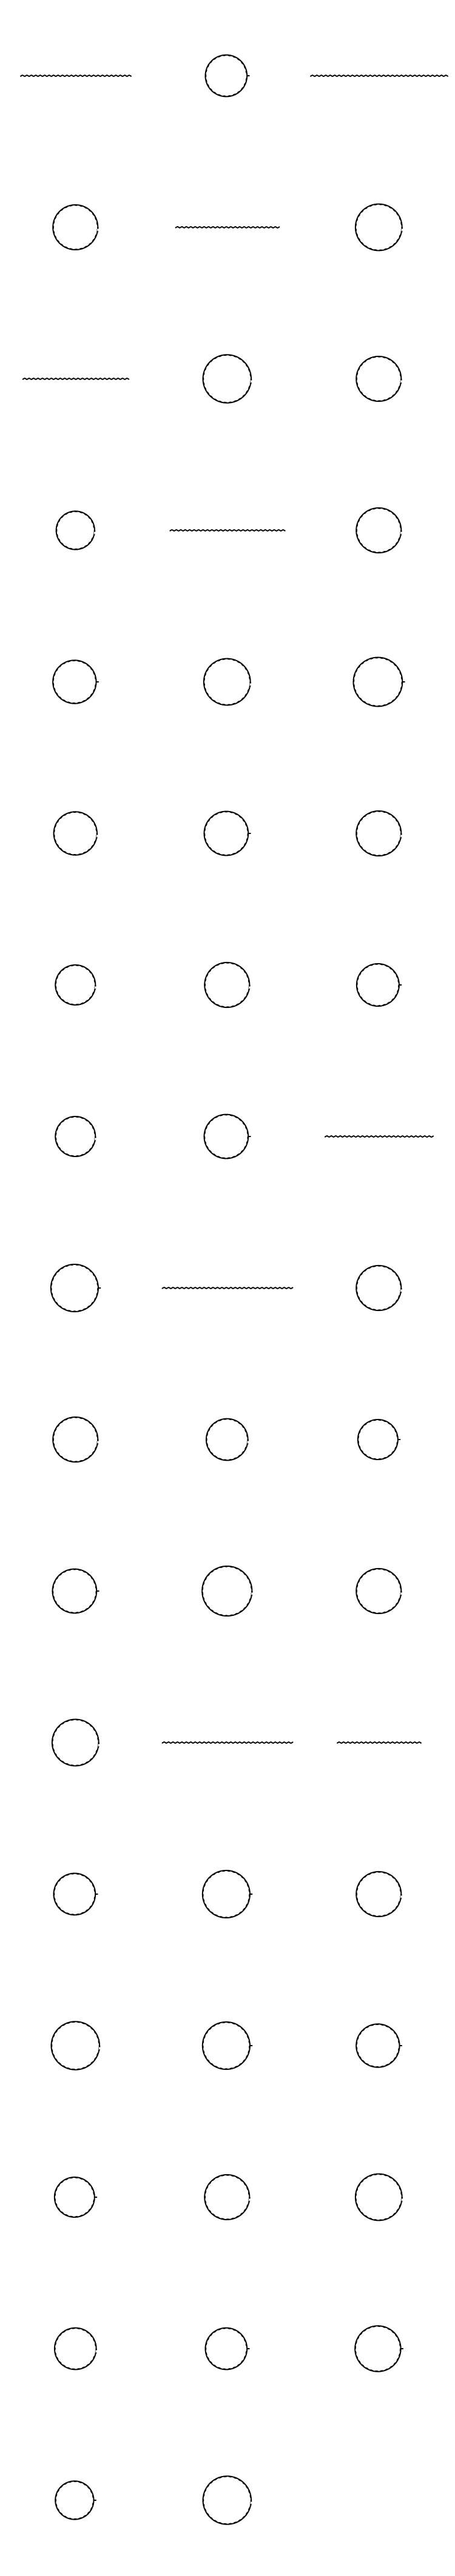

In [16]:

Chem.Draw.MolsToGridImage(
          molecules_analysis,
          molsPerRow=3,
          subImgSize=(250, 250)
)


## Analyze and Select molecules

In [17]:

print(    sorted(  [x.GetNumAtoms() for x in molecules_analysis]   )    )


[39, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 50, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 57, 57, 57, 57, 57, 57, 59, 59, 59, 59, 59, 59, 59, 60, 60, 61, 61, 63, 63, 63, 63]


In [18]:

good_mol_list = [x for x in molecules_analysis if x.GetNumAtoms() > 10 and x.GetNumAtoms() < 50 ]
print(   len(good_mol_list)   )


8



## Quantitative Estimate of drug likeness (QED score)


In [19]:

qed_list = [  Chem.QED.qed(x) for x in good_mol_list ]

final_mol_list = [ (a, b) for a, b in zip(good_mol_list, qed_list) if b > 0.2 ]


In [20]:

final_mol_list


[(<rdkit.Chem.rdchem.Mol at 0x26c09c6cc80>, 0.2393978656606183),
 (<rdkit.Chem.rdchem.Mol at 0x26c09c6d070>, 0.23213248064012218),
 (<rdkit.Chem.rdchem.Mol at 0x26c09c6d1c0>, 0.23213248064012218),
 (<rdkit.Chem.rdchem.Mol at 0x26c09c6dd90>, 0.25091004592151317)]


## Visualize


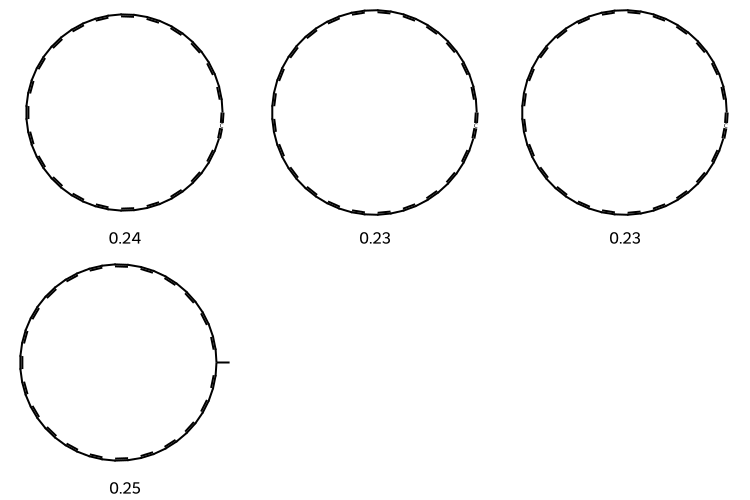

In [21]:

Chem.Draw.MolsToGridImage(
            [ x[0] for x in final_mol_list],
            molsPerRow=3,
            subImgSize=(250, 250),
            legends=[f"{x[1]:.2f}" for x in final_mol_list]
                          
)
